# Image Basics

This notebook demonstrates how to load an image via Python and apply image processing functions via `scikit-image`.

In [20]:
import numpy as np
import skimage.io as io
import skimage.color as color
from skimage import transform

%matplotlib notebook

<IPython.core.display.Javascript object>


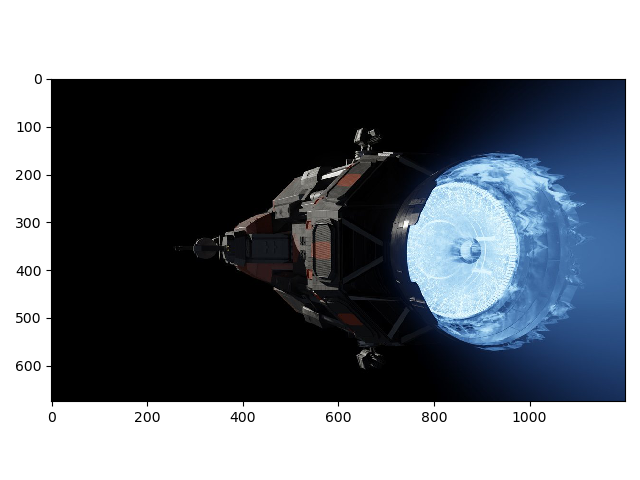

In [7]:
img = io.imread("img/roci.jpg")
io.imshow(img)

# Playing with color spaces

Conversion between different color spaces is simple with `skimage.color`

<IPython.core.display.Javascript object>


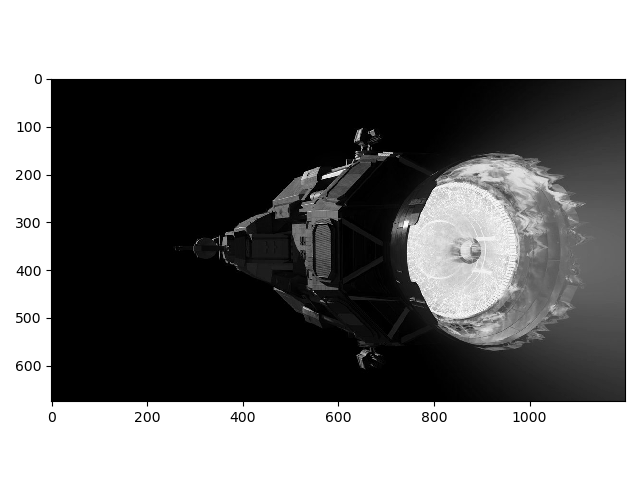

In [16]:
img_hsv = color.rgb2hsv(img)
img_hsv[:, :, 0] -= 0.8
io.imshow(color.hsv2rgb(img_hsv))

<IPython.core.display.Javascript object>


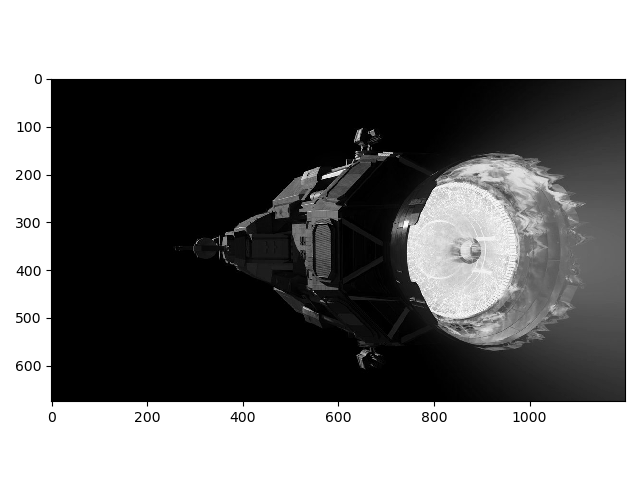

In [19]:
img_gray = color.rgb2gray(img)
io.imshow(img_gray)

# Geometric Transformations

`scikit-image` provides functions for performing general Euclidean transformations.

<IPython.core.display.Javascript object>


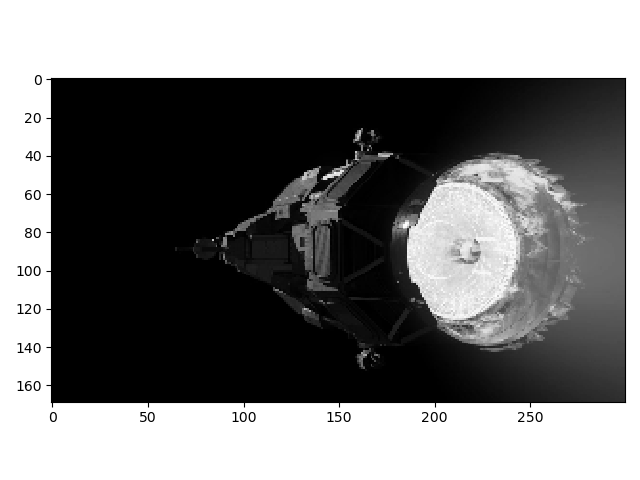

In [28]:
# Create a transformation matrix
rot_rad = np.pi / 8
translate = [0, -300]
M = np.array([
    [np.cos(rot_rad), -np.sin(rot_rad), translate[0]],
    [np.sin(rot_rad), np.cos(rot_rad), translate[1]],
    [0, 0, 1]
])

# Create the transformation object
tform = transform.EuclideanTransform(M)

# Apply the transformation
tf_img = transform.warp(img, tform.inverse)

io.imshow(tf_img)

# Resizing Images

<IPython.core.display.Javascript object>


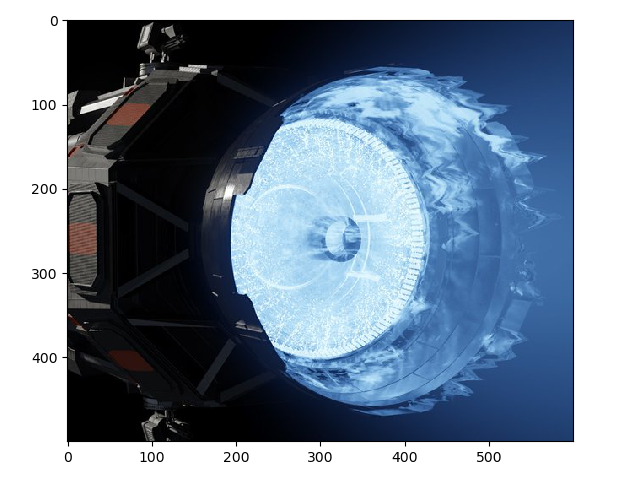

In [46]:
img_rescaled = transform.rescale(img, [0.2, 0.2, 1], anti_aliasing=False)
# img_resized = (img, (img.shape[0] * 2, img.shape[1] * 2, 1))
io.imshow(img_rescaled)

# Cropping Images

<IPython.core.display.Javascript object>


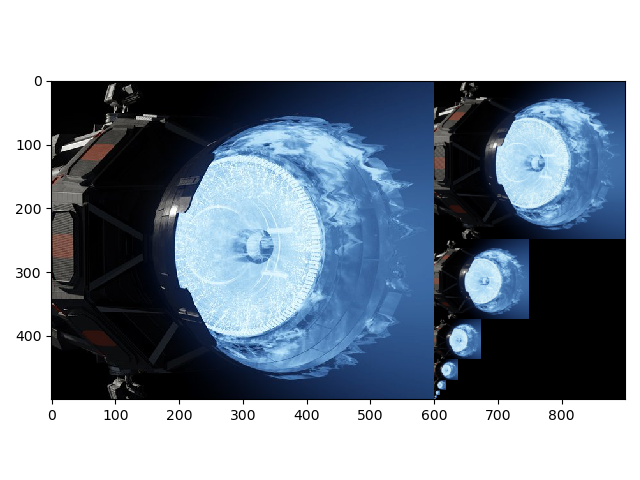

In [51]:
img_crop = img[100:600, 550:1150]

io.imshow(img_crop)

# Image Pyramid

<IPython.core.display.Javascript object>


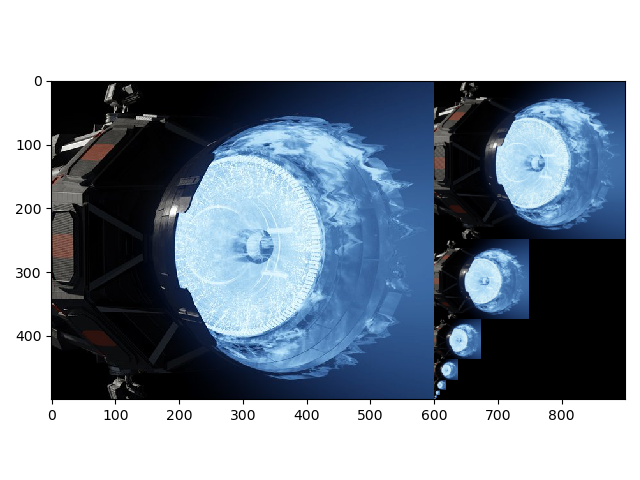

In [61]:
rows, cols, channels = img_crop.shape
# Create tuple of downscaled images
pyramid = tuple(transform.pyramid_gaussian(img_crop, downscale=2, multichannel=True))

comp_img = np.zeros((rows, cols+cols // 2, channels), dtype=np.double)
# Place the largest (original) image first
comp_img[:rows, :cols, :] = pyramid[0]

# Add in the other images
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    comp_img[i_row:i_row + n_rows, cols:cols + n_cols, :] = p
    i_row += n_rows
    
io.imshow(comp_img)